# Time Series Energy Consumption

[Reference](https://towardsdatascience.com/time-series-forecasting-on-power-consumption-273d56768b99)

## Objective

* Load time series dataset
* Visualize time series data
* Perform time series analysis and forecast

---

## Datasets

* Our World in Data
* euroStat (Europe)
* EIA (USA)
---
Extra:
* ENTSOE

###  Our World in Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
ourWorldinData_filePath = '../data/section4/ourWorldInData/global-energy-substitution.csv'
ourWorldinData = pd.read_csv(ourWorldinData_filePath)

In [3]:
ourWorldinData.head()

,Entity,Code,Year,"Other renewables (TWh, substituted energy)","Biofuels (TWh, substituted energy)","Solar (TWh, substituted energy)","Wind (TWh, substituted energy)","Hydropower (TWh, substituted energy)","Nuclear (TWh, substituted energy)","Gas (TWh, substituted energy)","Oil (TWh, substituted energy)","Coal (TWh, substituted energy)","Traditional biomass (TWh, substituted energy)"
0,World,OWID_WRL,1800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,5556
1,World,OWID_WRL,1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,5833
2,World,OWID_WRL,1820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,6111
3,World,OWID_WRL,1830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0,6389
4,World,OWID_WRL,1840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0,6944


In [4]:
# Drop the columns Entity and Code
ourWorldinData = ourWorldinData.drop(['Entity', 'Code'], axis=1)

In [5]:
# Set the Year column as the index
ourWorldinData = ourWorldinData.set_index('Year')

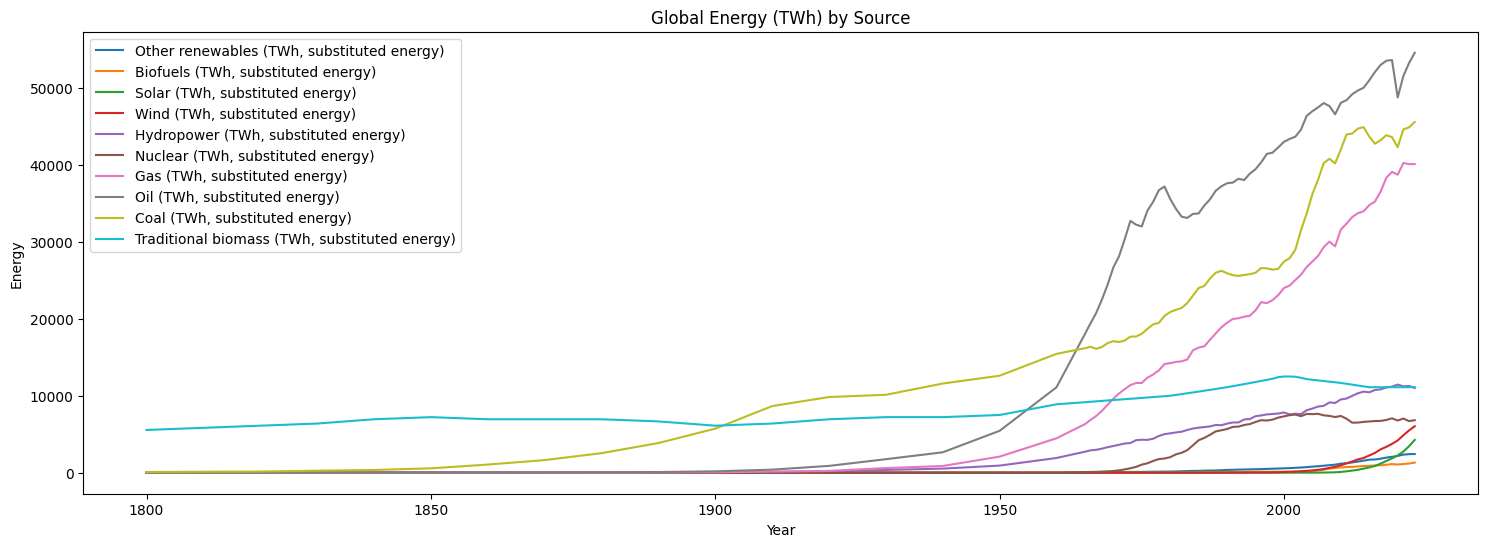

In [6]:
# Plot
plt.figure(figsize=(18, 6))
ourWorldinData.plot(ax=plt.gca())
plt.title('Global Energy (TWh) by Source')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.savefig('../images/section4/worldDatainPlot_EnergyBySource_plot.png')
plt.show()

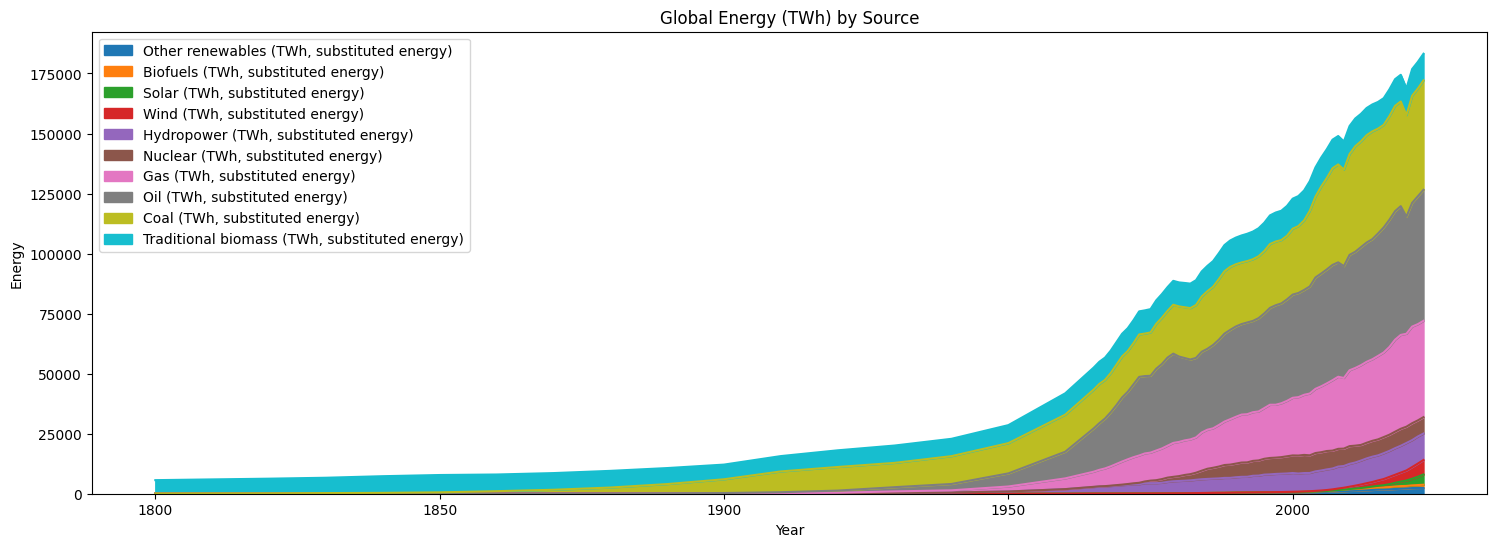

In [7]:
# Plot filling the lines below
plt.figure(figsize=(18, 6))
ourWorldinData.plot(ax=plt.gca(), kind='area', stacked=True)
plt.title('Global Energy (TWh) by Source')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.savefig('../images/section4/worldDatainPlot_EnergyBySource_plot_filled.png')
plt.show()

---

### euroStat

In [8]:
euroStat_coal_filePath = '../data/section4/euroStat/nrg_cb_pem_page_spreadsheet_coal.xlsx'
euroStat_nonRenewables_filePath = '../data/section4/euroStat/nrg_cb_pem_page_spreadsheet_combustionFuels_nonRenewables.xlsx'
euroStat_renewables_filePath = '../data/section4/euroStat/nrg_cb_pem_page_spreadsheet_combustionFuels_Renewables.xlsx'
euroStat_geothermal_filePath = '../data/section4/euroStat/nrg_cb_pem_page_spreadsheet_geothermal.xlsx'
euroStat_hydro_filePath = '../data/section4/euroStat/nrg_cb_pem_page_spreadsheet_hydro.xlsx'
euroStat_naturalGas_filePath = '../data/section4/euroStat/nrg_cb_pem_page_spreadsheet_naturalGas.xlsx'
euroStat_nuclear_filePath = '../data/section4/euroStat/nrg_cb_pem_page_spreadsheet_nuclear.xlsx'
euroStat_oil_filePath = '../data/section4/euroStat/nrg_cb_pem_page_spreadsheet_oil.xlsx'
euro_otherRenewables_filePath = '../data/section4/euroStat/nrg_cb_pem_page_spreadsheet_otherRenewables.xlsx'
euroStat_solar_filePath = '../data/section4/euroStat/nrg_cb_pem_page_spreadsheet_solar.xlsx'
euroStat_wind_filePath = '../data/section4/euroStat/nrg_cb_pem_page_spreadsheet_wind.xlsx'

In [9]:
# Load .xlsx file
euroStat_coal = pd.read_excel(euroStat_coal_filePath, sheet_name='coal', skiprows=range(0, 8))
euroStat_nonRenewables = pd.read_excel(euroStat_nonRenewables_filePath, sheet_name='nonRenewables', skiprows=range(0, 8))
euroStat_renewables = pd.read_excel(euroStat_renewables_filePath, sheet_name='renewables', skiprows=range(0, 8))
euroStat_geothermal = pd.read_excel(euroStat_geothermal_filePath, sheet_name='geothermal', skiprows=range(0, 8))
euroStat_hydro = pd.read_excel(euroStat_hydro_filePath, sheet_name='hydro', skiprows=range(0, 8))
euroStat_naturalGas = pd.read_excel(euroStat_naturalGas_filePath, sheet_name='naturalGas', skiprows=range(0, 8))
euroStat_nuclear = pd.read_excel(euroStat_nuclear_filePath, sheet_name='nuclear', skiprows=range(0, 8))
euroStat_oil = pd.read_excel(euroStat_oil_filePath, sheet_name='oil', skiprows=range(0, 8))
euro_otherRenewables = pd.read_excel(euro_otherRenewables_filePath, sheet_name='otherRenewables', skiprows=range(0, 8))
euroStat_solar = pd.read_excel(euroStat_solar_filePath, sheet_name='solar', skiprows=range(0, 8))
euroStat_wind = pd.read_excel(euroStat_wind_filePath, sheet_name='wind', skiprows=range(0, 8))


In [10]:
euroStat_coal.head()

,TIME,2016-01,Unnamed: 2,2016-02,Unnamed: 4,2016-03,Unnamed: 6,2016-04,Unnamed: 8,2016-05,...,Unnamed: 196,2024-03,Unnamed: 198,2024-04,Unnamed: 200,2024-05,Unnamed: 202,2024-06,Unnamed: 204,2024-07
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,23110.523,NaN,:,NaN,:,NaN,:,NaN,:
2,Belgium,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,160.492,NaN,168.435,NaN,179.131,NaN,:,NaN,:
3,Bulgaria,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,519.203,NaN,360.31,NaN,290.517,NaN,:,NaN,:
4,Czechia,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,2159.708,NaN,1550.964,NaN,1480.491,NaN,:,NaN,:


In [11]:
# Remove Row 0 and 1
euroStat_coal = euroStat_coal.drop([0, 1])
euroStat_nonRenewables = euroStat_nonRenewables.drop([0, 1])
euroStat_renewables = euroStat_renewables.drop([0, 1])
euroStat_geothermal = euroStat_geothermal.drop([0, 1])
euroStat_hydro = euroStat_hydro.drop([0, 1])
euroStat_naturalGas = euroStat_naturalGas.drop([0, 1])
euroStat_nuclear = euroStat_nuclear.drop([0, 1])
euroStat_oil = euroStat_oil.drop([0, 1])
euro_otherRenewables = euro_otherRenewables.drop([0, 1])
euroStat_solar = euroStat_solar.drop([0, 1])
euroStat_wind = euroStat_wind.drop([0, 1])

In [12]:
euroStat_coal.tail(10)

,TIME,2016-01,Unnamed: 2,2016-02,Unnamed: 4,2016-03,Unnamed: 6,2016-04,Unnamed: 8,2016-05,...,Unnamed: 196,2024-03,Unnamed: 198,2024-04,Unnamed: 200,2024-05,Unnamed: 202,2024-06,Unnamed: 204,2024-07
40,Ukraine,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
41,Kosovo*,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Special value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,:,not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Available flags:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,c,confidential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,e,estimated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,p,provisional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,u,low reliability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Remove rows 40 till the end
euroStat_coal = euroStat_coal.drop(euroStat_coal.index[40:])
euroStat_nonRenewables = euroStat_nonRenewables.drop(euroStat_nonRenewables.index[40:])
euroStat_renewables = euroStat_renewables.drop(euroStat_renewables.index[40:])
euroStat_geothermal = euroStat_geothermal.drop(euroStat_geothermal.index[40:])
euroStat_hydro = euroStat_hydro.drop(euroStat_hydro.index[40:])
euroStat_naturalGas = euroStat_naturalGas.drop(euroStat_naturalGas.index[40:])
euroStat_nuclear = euroStat_nuclear.drop(euroStat_nuclear.index[40:])
euroStat_oil = euroStat_oil.drop(euroStat_oil.index[40:])
euro_otherRenewables = euro_otherRenewables.drop(euro_otherRenewables.index[40:])
euroStat_solar = euroStat_solar.drop(euroStat_solar.index[40:])
euroStat_wind = euroStat_wind.drop(euroStat_wind.index[40:])

In [14]:
euroStat_coal.tail(10)

,TIME,2016-01,Unnamed: 2,2016-02,Unnamed: 4,2016-03,Unnamed: 6,2016-04,Unnamed: 8,2016-05,...,Unnamed: 196,2024-03,Unnamed: 198,2024-04,Unnamed: 200,2024-05,Unnamed: 202,2024-06,Unnamed: 204,2024-07
32,Bosnia and Herzegovina,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,613.592,NaN,554.959,NaN,675.837,NaN,:,NaN,:
33,Montenegro,:,NaN,:,NaN,:,NaN,:,NaN,:,...,p,120.47,p,21.378,p,0,p,:,NaN,:
34,Moldova,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,0,NaN,0,NaN,0,NaN,:,NaN,:
35,North Macedonia,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,195.18,NaN,201.173,NaN,183.39,NaN,:,NaN,:
36,Georgia,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,0,NaN,:,NaN,:,NaN,:,NaN,:
37,Albania,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,0,NaN,0,NaN,0,NaN,:,NaN,:
38,Serbia,:,NaN,:,NaN,:,NaN,:,NaN,:,...,e,1922.887,e,1521.316,e,1385.118,e,:,NaN,:
39,Türkiye,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,8724.469,NaN,5744.181,NaN,7498.811,NaN,:,NaN,:
40,Ukraine,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
41,Kosovo*,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:


In [15]:
# Reset the index
euroStat_coal = euroStat_coal.reset_index(drop=True)
euroStat_nonRenewables = euroStat_nonRenewables.reset_index(drop=True)
euroStat_renewables = euroStat_renewables.reset_index(drop=True)
euroStat_geothermal = euroStat_geothermal.reset_index(drop=True)
euroStat_hydro = euroStat_hydro.reset_index(drop=True)
euroStat_naturalGas = euroStat_naturalGas.reset_index(drop=True)
euroStat_nuclear = euroStat_nuclear.reset_index(drop=True)
euroStat_oil = euroStat_oil.reset_index(drop=True)
euro_otherRenewables = euro_otherRenewables.reset_index(drop=True)
euroStat_solar = euroStat_solar.reset_index(drop=True)
euroStat_wind = euroStat_wind.reset_index(drop=True)

In [16]:
euroStat_coal.head()

,TIME,2016-01,Unnamed: 2,2016-02,Unnamed: 4,2016-03,Unnamed: 6,2016-04,Unnamed: 8,2016-05,...,Unnamed: 196,2024-03,Unnamed: 198,2024-04,Unnamed: 200,2024-05,Unnamed: 202,2024-06,Unnamed: 204,2024-07
0,Belgium,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,160.492,NaN,168.435,NaN,179.131,NaN,:,NaN,:
1,Bulgaria,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,519.203,NaN,360.31,NaN,290.517,NaN,:,NaN,:
2,Czechia,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,2159.708,NaN,1550.964,NaN,1480.491,NaN,:,NaN,:
3,Denmark,:,NaN,:,NaN,:,NaN,:,NaN,:,...,NaN,276.518,NaN,148.599,NaN,100.237,NaN,82.366,NaN,:
4,Germany,:,NaN,:,NaN,:,NaN,:,NaN,:,...,e,8758.996,e,6004.85,e,5838.8,e,:,NaN,:


In [17]:
# Drop all the columns that column name start with Unnamed:
euroStat_coal = euroStat_coal.loc[:, ~euroStat_coal.columns.str.contains('^Unnamed')]
euroStat_nonRenewables = euroStat_nonRenewables.loc[:, ~euroStat_nonRenewables.columns.str.contains('^Unnamed')]
euroStat_renewables = euroStat_renewables.loc[:, ~euroStat_renewables.columns.str.contains('^Unnamed')]
euroStat_geothermal = euroStat_geothermal.loc[:, ~euroStat_geothermal.columns.str.contains('^Unnamed')]
euroStat_hydro = euroStat_hydro.loc[:, ~euroStat_hydro.columns.str.contains('^Unnamed')]
euroStat_naturalGas = euroStat_naturalGas.loc[:, ~euroStat_naturalGas.columns.str.contains('^Unnamed')]
euroStat_nuclear = euroStat_nuclear.loc[:, ~euroStat_nuclear.columns.str.contains('^Unnamed')]
euroStat_oil = euroStat_oil.loc[:, ~euroStat_oil.columns.str.contains('^Unnamed')]
euro_otherRenewables = euro_otherRenewables.loc[:, ~euro_otherRenewables.columns.str.contains('^Unnamed')]
euroStat_solar = euroStat_solar.loc[:, ~euroStat_solar.columns.str.contains('^Unnamed')]
euroStat_wind = euroStat_wind.loc[:, ~euroStat_wind.columns.str.contains('^Unnamed')]

In [18]:
euroStat_coal.head()

,TIME,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07
0,Belgium,:,:,:,:,:,:,:,:,:,...,70.669,64.24,100.765,152.345,175.176,160.492,168.435,179.131,:,:
1,Bulgaria,:,:,:,:,:,:,:,:,:,...,781.035,871.225,1043.759,905.171,583.303,519.203,360.31,290.517,:,:
2,Czechia,:,:,:,:,:,:,:,:,:,...,2610.974,2753.006,2762.875,2590.198,2245.389,2159.708,1550.964,1480.491,:,:
3,Denmark,:,:,:,:,:,:,:,:,:,...,44.275,226.176,257.861,392.265,248.43,276.518,148.599,100.237,82.366,:
4,Germany,:,:,:,:,:,:,:,:,:,...,9674.588,10947.152,10597.592,10536.739,8501.007,8758.996,6004.85,5838.8,:,:


In [19]:
euroStat_coal.iloc[0, 1]

':'

In [20]:
# Replace all the ':' with np.nan
euroStat_coal = euroStat_coal.replace(':', np.nan)
euroStat_nonRenewables = euroStat_nonRenewables.replace(':', np.nan)
euroStat_renewables = euroStat_renewables.replace(':', np.nan)
euroStat_geothermal = euroStat_geothermal.replace(':', np.nan)
euroStat_hydro = euroStat_hydro.replace(':', np.nan)
euroStat_naturalGas = euroStat_naturalGas.replace(':', np.nan)
euroStat_nuclear = euroStat_nuclear.replace(':', np.nan)
euroStat_oil = euroStat_oil.replace(':', np.nan)
euro_otherRenewables = euro_otherRenewables.replace(':', np.nan)
euroStat_solar = euroStat_solar.replace(':', np.nan)
euroStat_wind = euroStat_wind.replace(':', np.nan)


/tmp/ipykernel_2957/1879075490.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  euroStat_coal = euroStat_coal.replace(':', np.nan)
/tmp/ipykernel_2957/1879075490.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  euroStat_nonRenewables = euroStat_nonRenewables.replace(':', np.nan)
/tmp/ipykernel_2957/1879075490.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behav

In [21]:
euroStat_coal.head()

,TIME,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07
0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.669,64.240,100.765,152.345,175.176,160.492,168.435,179.131,NaN,NaN
1,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,781.035,871.225,1043.759,905.171,583.303,519.203,360.310,290.517,NaN,NaN
2,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2610.974,2753.006,2762.875,2590.198,2245.389,2159.708,1550.964,1480.491,NaN,NaN
3,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.275,226.176,257.861,392.265,248.430,276.518,148.599,100.237,82.366,NaN
4,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9674.588,10947.152,10597.592,10536.739,8501.007,8758.996,6004.850,5838.800,NaN,NaN


In [22]:
euroStat_coal.describe()

,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,...,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.000000,37.000000,37.000000,37.00000,37.000000,36.000000,35.000000,35.000000,10.000000,1.000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1023.099553,1081.994459,1097.281432,1092.47973,962.771432,963.531139,736.652314,764.583629,57.478400,126.782
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2468.818235,2606.780404,2615.283993,2586.91216,2263.759239,2294.703207,1703.455207,1847.354565,76.517595,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,126.782
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,126.782
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.150000,146.045000,158.347000,162.18000,170.150000,167.411000,161.210000,66.136000,21.000000,126.782
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,483.158000,537.000000,578.000000,514.00000,448.000000,428.300750,354.655000,356.258500,79.796750,126.782
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9730.286000,10947.152000,10597.592000,10536.73900,9260.997000,8758.996000,6476.609000,7498.811000,213.047000,126.782


![datasetYear_Image](../images/section4/datasetYear_Image.jpg) 

In [23]:
print('Number of countries: ', euroStat_coal.shape[0])

Number of countries:  40


In [24]:
print('Number of Months: ', euroStat_coal.shape[1])

Number of Months:  104


In [25]:
# Name of datasets (files) in the same order as they were loaded
datasets = ['coal', 'nonRenewables', 'renewables', 'geothermal', 'hydro', 'naturalGas', 'nuclear', 'oil', 'otherRenewables', 'solar', 'wind']

print('Number of datasets: ', len(datasets))

Number of datasets:  11


In [26]:
# Create an empty pandas DataFrame with the number of datasets, and the number of columns equal to the number of years in the dataset
euroStat_totalDatasetYear = pd.DataFrame(index=range(0, len(datasets)), columns=range(0, euroStat_coal.shape[1]))

In [27]:
type(euroStat_totalDatasetYear)

pandas.core.frame.DataFrame

In [28]:
# Check number of rows and columns in euroStat_totalDatasetYear
print('Number of Rows: ', euroStat_totalDatasetYear.shape[0])
print('Number of Columns: ', euroStat_totalDatasetYear.shape[1])

Number of Rows:  11
Number of Columns:  104


In [29]:
euroStat_totalDatasetYear.iloc[0, :] = euroStat_coal.sum(axis=0)
euroStat_totalDatasetYear.iloc[1, :] = euroStat_nonRenewables.sum(axis=0)
euroStat_totalDatasetYear.iloc[2, :] = euroStat_renewables.sum(axis=0)
euroStat_totalDatasetYear.iloc[3, :] = euroStat_geothermal.sum(axis=0)
euroStat_totalDatasetYear.iloc[4, :] = euroStat_hydro.sum(axis=0)
euroStat_totalDatasetYear.iloc[5, :] = euroStat_naturalGas.sum(axis=0)
euroStat_totalDatasetYear.iloc[6, :] = euroStat_nuclear.sum(axis=0)
euroStat_totalDatasetYear.iloc[7, :] = euroStat_oil.sum(axis=0)
euroStat_totalDatasetYear.iloc[8, :] = euro_otherRenewables.sum(axis=0) 
euroStat_totalDatasetYear.iloc[9, :] = euroStat_solar.sum(axis=0)
euroStat_totalDatasetYear.iloc[10, :] = euroStat_wind.sum(axis=0)


In [30]:
euroStat_totalDatasetYear.describe()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
count,11,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,11.000,11.000,11.000,11.00,11.000,11.000,11.000,11.000,11.000,11.0
unique,1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,11.000,11.000,11.000,11.00,11.000,11.000,11.000,11.000,11.000,9.0
top,BelgiumBulgariaCzechiaDenmarkGermanyEstoniaIre...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38877.783,40033.795,40599.413,40421.75,35622.543,34687.121,25782.831,26760.427,574.784,0.0
freq,11,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,3.0


In [31]:
euroStat_totalDatasetYear.shape

(11, 104)

In [32]:
euroStat_totalDatasetYear.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,BelgiumBulgariaCzechiaDenmarkGermanyEstoniaIre...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38877.783,40033.795,40599.413,40421.75,35622.543,34687.121,25782.831,26760.427,574.784,126.782
1,BelgiumBulgariaCzechiaDenmarkGermanyEstoniaIre...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2848.331,3008.619,2955.024,2835.832,2591.689,2746.969,2492.858,2511.796,409.146,27.46
2,BelgiumBulgariaCzechiaDenmarkGermanyEstoniaIre...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8735.001,9607.019,10579.658,10359.857,9899.243,10243.851,8633.835,8558.159,2643.777,68.904
3,BelgiumBulgariaCzechiaDenmarkGermanyEstoniaIre...,836.0,778.0,843.0,794.0,819.0,776.0,839.0,852.0,812.0,...,1771.09,1748.82,1868.427,1881.196,1750.637,1855.409,1715.209,1696.613,490.617,0.0
4,BelgiumBulgariaCzechiaDenmarkGermanyEstoniaIre...,54566.0,55703.0,55078.0,56850.0,56919.0,54278.0,48115.0,43774.0,39153.0,...,43579.002,57411.557,61478.482,64002.077,56758.712,62781.864,58162.224,58848.212,21903.024,41.035


In [33]:
# Replace the first column with the dataset names
euroStat_totalDatasetYear.iloc[:, 0] = datasets

In [34]:
euroStat_totalDatasetYear.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,coal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38877.783,40033.795,40599.413,40421.75,35622.543,34687.121,25782.831,26760.427,574.784,126.782
1,nonRenewables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2848.331,3008.619,2955.024,2835.832,2591.689,2746.969,2492.858,2511.796,409.146,27.46
2,renewables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8735.001,9607.019,10579.658,10359.857,9899.243,10243.851,8633.835,8558.159,2643.777,68.904
3,geothermal,836.0,778.0,843.0,794.0,819.0,776.0,839.0,852.0,812.0,...,1771.09,1748.82,1868.427,1881.196,1750.637,1855.409,1715.209,1696.613,490.617,0.0
4,hydro,54566.0,55703.0,55078.0,56850.0,56919.0,54278.0,48115.0,43774.0,39153.0,...,43579.002,57411.557,61478.482,64002.077,56758.712,62781.864,58162.224,58848.212,21903.024,41.035


In [35]:
# Move the first column to the index
euroStat_totalDatasetYear.set_index(0, inplace=True)

In [36]:
euroStat_totalDatasetYear.head()

,1,2,3,4,5,6,7,8,9,10,...,94,95,96,97,98,99,100,101,102,103
0,,,,,,,,,,,,,,,,,,,,,
coal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38877.783,40033.795,40599.413,40421.75,35622.543,34687.121,25782.831,26760.427,574.784,126.782
nonRenewables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2848.331,3008.619,2955.024,2835.832,2591.689,2746.969,2492.858,2511.796,409.146,27.46
renewables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8735.001,9607.019,10579.658,10359.857,9899.243,10243.851,8633.835,8558.159,2643.777,68.904
geothermal,836.0,778.0,843.0,794.0,819.0,776.0,839.0,852.0,812.0,871.0,...,1771.09,1748.82,1868.427,1881.196,1750.637,1855.409,1715.209,1696.613,490.617,0.0
hydro,54566.0,55703.0,55078.0,56850.0,56919.0,54278.0,48115.0,43774.0,39153.0,40055.0,...,43579.002,57411.557,61478.482,64002.077,56758.712,62781.864,58162.224,58848.212,21903.024,41.035


In [37]:
# The first column represent the month 2016-01. I want to replace the header (from the first column till the end of the dataset) as a date
# Create a list of dates
dates = pd.date_range(start='2016-01-01', periods=euroStat_totalDatasetYear.shape[1], freq='M')

# Replace the header of the euroStat_totalDatasetYear with the dates list
euroStat_totalDatasetYear.columns = dates

/tmp/ipykernel_2957/1712523974.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2016-01-01', periods=euroStat_totalDatasetYear.shape[1], freq='M')


In [38]:
# At the index, name the column as 'Dataset'
euroStat_totalDatasetYear.index.name = 'Dataset'

In [39]:
euroStat_totalDatasetYear.head()

,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
Dataset,,,,,,,,,,,,,,,,,,,,,
coal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38877.783,40033.795,40599.413,40421.75,35622.543,34687.121,25782.831,26760.427,574.784,126.782
nonRenewables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2848.331,3008.619,2955.024,2835.832,2591.689,2746.969,2492.858,2511.796,409.146,27.46
renewables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8735.001,9607.019,10579.658,10359.857,9899.243,10243.851,8633.835,8558.159,2643.777,68.904
geothermal,836.0,778.0,843.0,794.0,819.0,776.0,839.0,852.0,812.0,871.0,...,1771.09,1748.82,1868.427,1881.196,1750.637,1855.409,1715.209,1696.613,490.617,0.0
hydro,54566.0,55703.0,55078.0,56850.0,56919.0,54278.0,48115.0,43774.0,39153.0,40055.0,...,43579.002,57411.557,61478.482,64002.077,56758.712,62781.864,58162.224,58848.212,21903.024,41.035


In [40]:
euroStat_totalDatasetYear.describe()

,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,11.000,11.000,11.000,11.00,11.000,11.000,11.000,11.000,11.000,11.0
unique,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,11.000,11.000,11.000,11.00,11.000,11.000,11.000,11.000,11.000,9.0
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38877.783,40033.795,40599.413,40421.75,35622.543,34687.121,25782.831,26760.427,574.784,0.0
freq,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,3.0


In [41]:
# Create a list of datasets

types = ['nonRenewables', 'renewables', 'otherRenewables']
nonRenewables = ['coal', 'naturalGas', 'nuclear', 'oil']
renewables = ['geothermal', 'hydro', 'solar', 'wind']

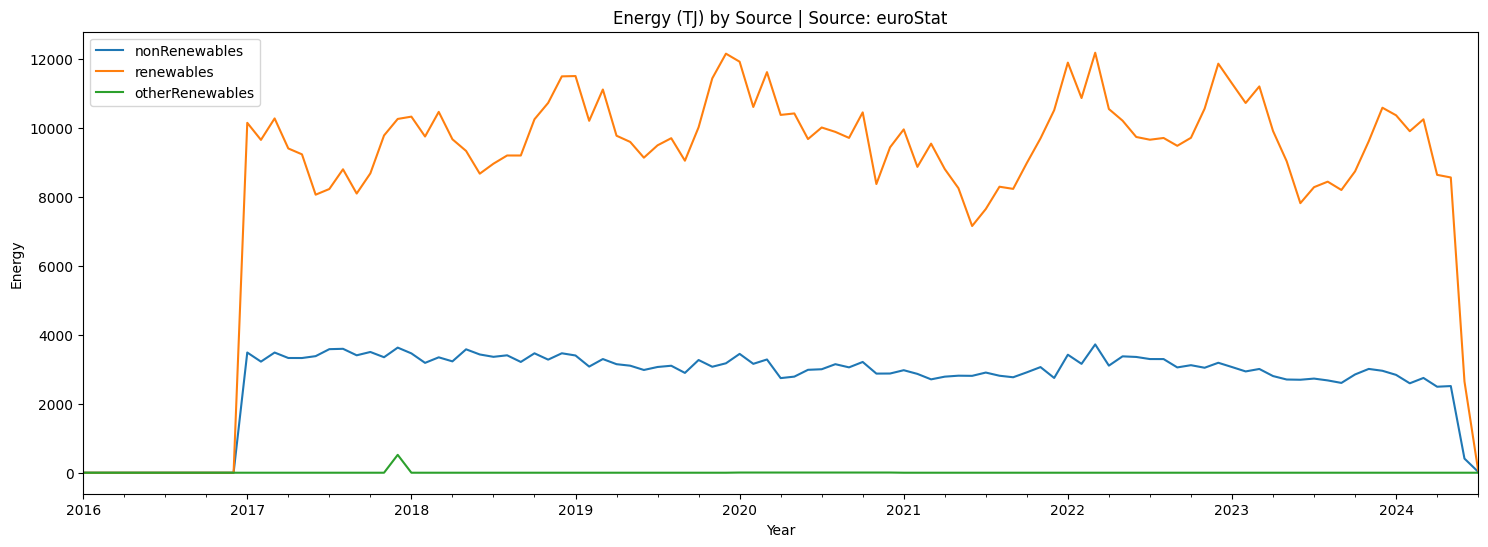

In [42]:
# Plot the types dataset data
plt.figure(figsize=(18, 6))
euroStat_totalDatasetYear.loc[types].T.plot(ax=plt.gca())
plt.title('Energy (TJ) by Source | Source: euroStat')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.legend(loc = 'upper left')
plt.savefig('../images/section4/euroStat_totalDatasetYear_plot_types.png')
plt.show()

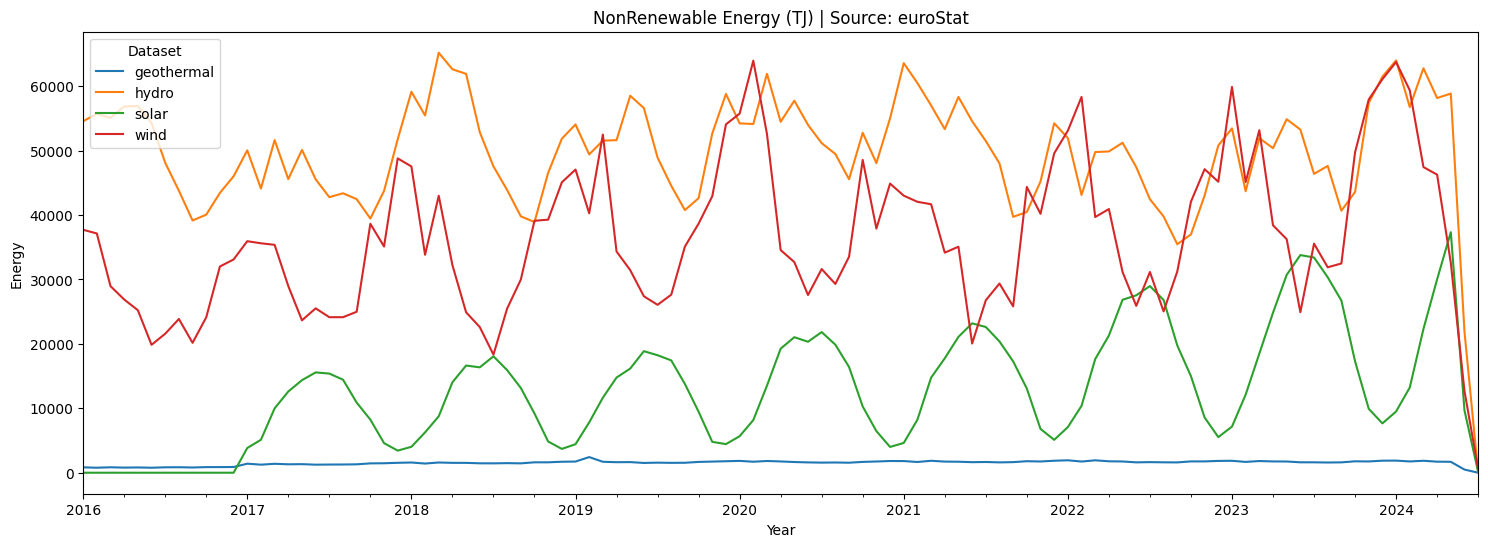

In [43]:
# Plot the types nonRenewables data
plt.figure(figsize=(18, 6))
euroStat_totalDatasetYear.loc[renewables].T.plot(ax=plt.gca())
plt.title('NonRenewable Energy (TJ) | Source: euroStat')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.savefig('../images/section4/euroStat_totalDatasetYear_plot_renewables.png')
plt.show()

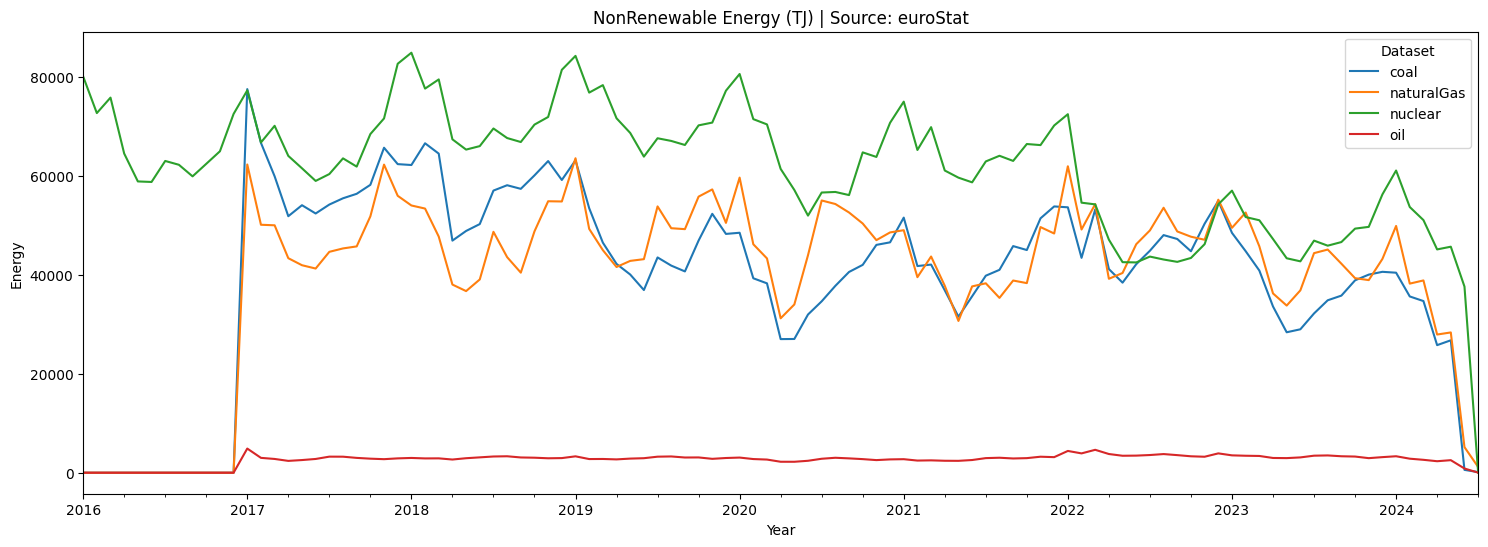

In [44]:
# Plot the types nonRenewables data
plt.figure(figsize=(18, 6))
euroStat_totalDatasetYear.loc[nonRenewables].T.plot(ax=plt.gca())
plt.title('NonRenewable Energy (TJ) | Source: euroStat')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.savefig('../images/section4/euroStat_totalDatasetYear_plot_nonRenewables.png')
plt.show()

---

![datasetDataset_Image](../images/section4/datasetDataset_Image.jpg) 

In [45]:
# Create a empty dataframe with the same number of rows as number of countries, and the columns as the number datasets
euroStat_totalDatasetCountry = pd.DataFrame(index=range(0, euroStat_coal.shape[0]), columns=range(0, len(datasets)))


In [46]:
# Check number of rows and columns in euroStat_totalCountryYear
print('Number of Rows: ', euroStat_totalDatasetCountry.shape[0])
print('Number of Columns: ', euroStat_totalDatasetCountry.shape[1])

Number of Rows:  40
Number of Columns:  11


In [47]:
euroStat_coal.head()

,TIME,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07
0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.669,64.240,100.765,152.345,175.176,160.492,168.435,179.131,NaN,NaN
1,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,781.035,871.225,1043.759,905.171,583.303,519.203,360.310,290.517,NaN,NaN
2,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2610.974,2753.006,2762.875,2590.198,2245.389,2159.708,1550.964,1480.491,NaN,NaN
3,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.275,226.176,257.861,392.265,248.430,276.518,148.599,100.237,82.366,NaN
4,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9674.588,10947.152,10597.592,10536.739,8501.007,8758.996,6004.850,5838.800,NaN,NaN


In [50]:
# Make a country list with the names in the first column of the euroStat_coal dataset
countries = euroStat_coal.iloc[:, 0]

In [51]:
countries.unique()

array(['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Norway',
       'United Kingdom', 'Bosnia and Herzegovina', 'Montenegro',
       'Moldova', 'North Macedonia', 'Georgia', 'Albania', 'Serbia',
       'Türkiye', 'Ukraine', 'Kosovo*'], dtype=object)

In [52]:
len(countries)

40

In [53]:
# Convert the column 0 to index
euroStat_coal.set_index('TIME', inplace=True)
euroStat_nonRenewables.set_index('TIME', inplace=True)
euroStat_renewables.set_index('TIME', inplace=True)
euroStat_geothermal.set_index('TIME', inplace=True)
euroStat_hydro.set_index('TIME', inplace=True)
euroStat_naturalGas.set_index('TIME', inplace=True)
euroStat_nuclear.set_index('TIME', inplace=True)
euroStat_oil.set_index('TIME', inplace=True)
euro_otherRenewables.set_index('TIME', inplace=True)
euroStat_solar.set_index('TIME', inplace=True)
euroStat_wind.set_index('TIME', inplace=True)

In [54]:
euroStat_coal.head()

,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,...,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07
TIME,,,,,,,,,,,,,,,,,,,,,
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.669,64.240,100.765,152.345,175.176,160.492,168.435,179.131,NaN,NaN
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,781.035,871.225,1043.759,905.171,583.303,519.203,360.310,290.517,NaN,NaN
Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2610.974,2753.006,2762.875,2590.198,2245.389,2159.708,1550.964,1480.491,NaN,NaN
Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.275,226.176,257.861,392.265,248.430,276.518,148.599,100.237,82.366,NaN
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9674.588,10947.152,10597.592,10536.739,8501.007,8758.996,6004.850,5838.800,NaN,NaN


In [55]:
# Change the index name to 'Country'
euroStat_coal.index.name = 'Country'
euroStat_nonRenewables.index.name = 'Country'
euroStat_renewables.index.name = 'Country'
euroStat_geothermal.index.name = 'Country'
euroStat_hydro.index.name = 'Country'
euroStat_naturalGas.index.name = 'Country'
euroStat_nuclear.index.name = 'Country'
euroStat_oil.index.name = 'Country'
euro_otherRenewables.index.name = 'Country'
euroStat_solar.index.name = 'Country'
euroStat_wind.index.name = 'Country'

In [56]:
euroStat_coal.head()

,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,...,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07
Country,,,,,,,,,,,,,,,,,,,,,
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.669,64.240,100.765,152.345,175.176,160.492,168.435,179.131,NaN,NaN
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,781.035,871.225,1043.759,905.171,583.303,519.203,360.310,290.517,NaN,NaN
Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2610.974,2753.006,2762.875,2590.198,2245.389,2159.708,1550.964,1480.491,NaN,NaN
Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.275,226.176,257.861,392.265,248.430,276.518,148.599,100.237,82.366,NaN
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9674.588,10947.152,10597.592,10536.739,8501.007,8758.996,6004.850,5838.800,NaN,NaN


In [57]:
euroStat_totalDatasetCountry.iloc[:, 0] = euroStat_coal.sum(axis=1)
euroStat_totalDatasetCountry.iloc[:, 1] = euroStat_nonRenewables.sum(axis=1)
euroStat_totalDatasetCountry.iloc[:, 2] = euroStat_renewables.sum(axis=1)
euroStat_totalDatasetCountry.iloc[:, 3] = euroStat_geothermal.sum(axis=1)
euroStat_totalDatasetCountry.iloc[:, 4] = euroStat_hydro.sum(axis=1)
euroStat_totalDatasetCountry.iloc[:, 5] = euroStat_naturalGas.sum(axis=1)
euroStat_totalDatasetCountry.iloc[:, 6] = euroStat_nuclear.sum(axis=1)
euroStat_totalDatasetCountry.iloc[:, 7] = euroStat_oil.sum(axis=1)
euroStat_totalDatasetCountry.iloc[:, 8] = euro_otherRenewables.sum(axis=1)
euroStat_totalDatasetCountry.iloc[:, 9] = euroStat_solar.sum(axis=1)
euroStat_totalDatasetCountry.iloc[:, 10] = euroStat_wind.sum(axis=1)

In [58]:
euroStat_totalDatasetCountry.head()

,0,1,2,3,4,5,6,7,8,9,10
0,14459.541,7098.58,31054.788,0.0,11316.466,157763.261,315452.159,170.419,0.0,37296.955,83867.592
1,107797.166,37.933,9275.717,0.0,31949.134,14426.208,129685.884,1768.95,0.0,13856.505,13411.419
2,248258.357,620.511,35426.109,0.0,27036.61,35919.871,233545.071,685.76,0.0,16846.783,5311.673
3,33084.961,5115.06,40697.046,0.0,147.912,11027.112,0.0,1517.413,0.0,12296.374,139625.079
4,1186213.046,123563.211,123383.883,1544.933,184485.798,552218.427,461308.744,32211.342,0.0,381673.0,1012756.0


In [59]:
# Replace the index in euroStat_totalDatasetCountry with the countries list
euroStat_totalDatasetCountry.index = countries

In [60]:
# Replace the column names with the datasets list
euroStat_totalDatasetCountry.columns = datasets

In [61]:
euroStat_totalDatasetCountry.head()

,coal,nonRenewables,renewables,geothermal,hydro,naturalGas,nuclear,oil,otherRenewables,solar,wind
TIME,,,,,,,,,,,
Belgium,14459.541,7098.58,31054.788,0.0,11316.466,157763.261,315452.159,170.419,0.0,37296.955,83867.592
Bulgaria,107797.166,37.933,9275.717,0.0,31949.134,14426.208,129685.884,1768.95,0.0,13856.505,13411.419
Czechia,248258.357,620.511,35426.109,0.0,27036.61,35919.871,233545.071,685.76,0.0,16846.783,5311.673
Denmark,33084.961,5115.06,40697.046,0.0,147.912,11027.112,0.0,1517.413,0.0,12296.374,139625.079
Germany,1186213.046,123563.211,123383.883,1544.933,184485.798,552218.427,461308.744,32211.342,0.0,381673.0,1012756.0


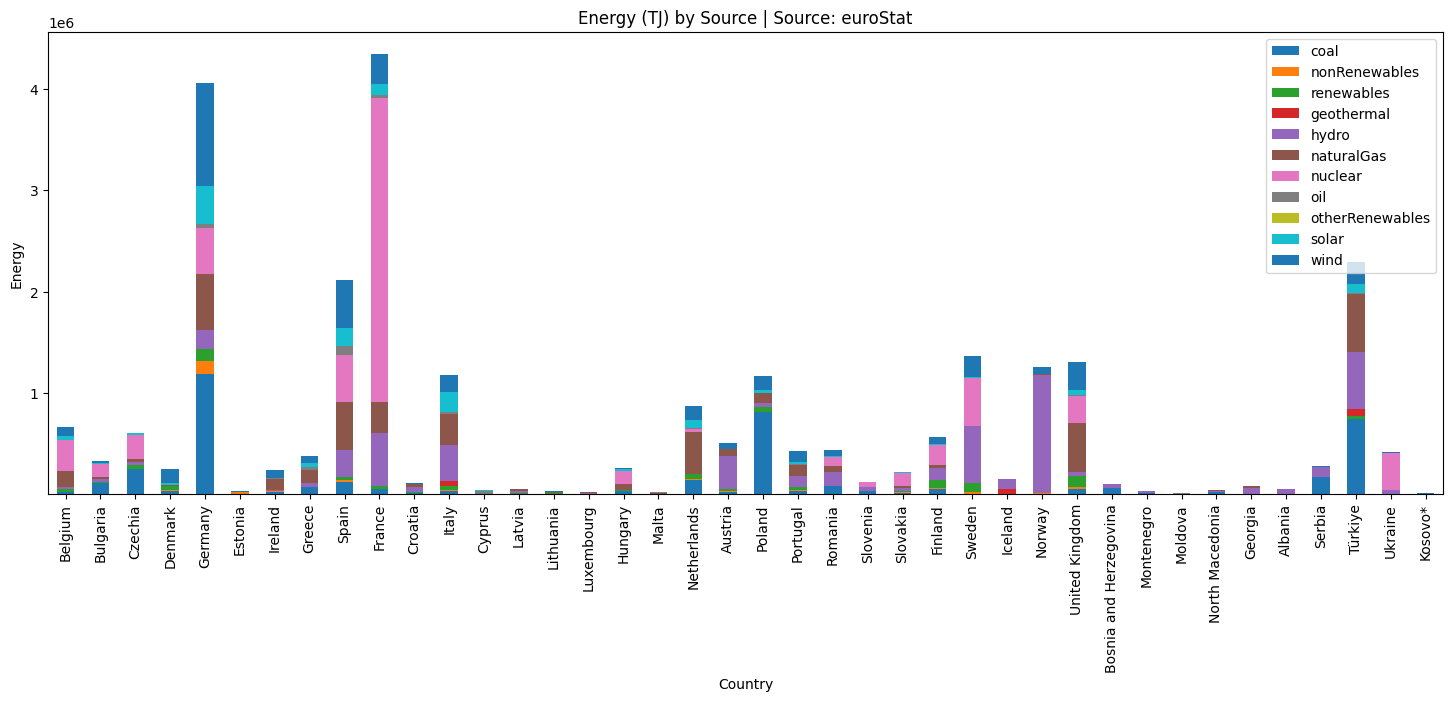

In [63]:
# Plot per country the energy consumption by source using a stacked bar plot
plt.figure(figsize=(18, 6))
euroStat_totalDatasetCountry.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Energy (TJ) by Source | Source: euroStat')
plt.xlabel('Country')
plt.ylabel('Energy')
plt.legend(loc = 'upper right')
plt.savefig('../images/section4/euroStat_totalDatasetCountry_plot.png')
plt.show()

/tmp/ipykernel_2957/972539220.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ax = euroStat_totalDatasetCountry.loc[country].plot(kind='pie', autopct='%1.1f%%', startangle=0)


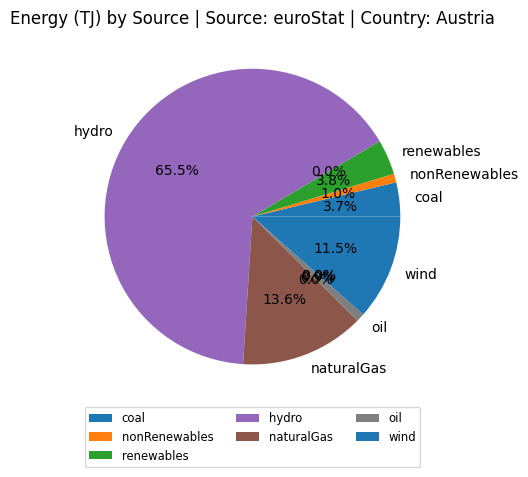

In [71]:
# Select a random country and plot a pie chart of the energy consumption by source
country = 'Austria'
ax = euroStat_totalDatasetCountry.loc[country].plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.title('Energy (TJ) by Source | Source: euroStat | Country: ' + country)
plt.ylabel('')

# Adjust legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0), fontsize='small', ncol=3)

plt.savefig('../images/section4/euroStat_totalDatasetCountry_plot_pie.png')
plt.show()


---

### EIA

---


### ENTSO-E

Western Europe Power Consumption | Five years of hourly electricity consumption of 15 European countries [link](https://www.kaggle.com/datasets/francoisraucent/western-europe-power-consumption)

ENTSO-E Transparency Platform gives access to electricity generation, transportation, and consumption data for the pan-European market. Part of this data is provided by the various transmission system operators (TSOs) accross Europe.

Western Europe Consumption data has been retrieved for each of the following countries : Austria, Belgium, Switzerland, Denmark, Germany, Spain, France, UK, Italy, Ireland, Luxembourg, the Netherlands, Norway, Portugal, and Sweden. The time resolution is either 15 minutes, 30 minutes or 1 hour depending on the country.

The consumption is given in Megawatts (MW) and goes from January 2015 up to August 2020.

## Dataset

Tétouan is a city in Morocco with a population of 380,000 people, occupying an area of 11,570 km². The city is located in the northern portion of the country and it faces the Mediterranean sea. The weather is particularly hot and humid during the summer.

52,416 energy consumption observations in 10-minute windows starting from January 1st, 2017, all the way through December 30th (not 31st) of the same year.

[UCI machine learning repository]('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')

### Variables

* **Date Time**: Time window of ten minutes.
* **Temperature**: Weather Temperature in °C
* **Humidity**: Weather Humidity in %
* **Wind Speed**: Wind Speed in km/h
* **Zone 1**:  Power Consumption in KiloWatts (KW)
* **Zone 2**: Power Consumption in KW
* **Zone 3**: Power Consumption in KW


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data from URL using pandas read_csv method
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')

In [ ]:
# Display the first lines of datsset
df.head()

In [ ]:
# Transforming DateTime column into index
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)

## EDA

### Correlation Matrix

The correlation matrix shows us the single correlation between each feature and the others on the dataset. In general, the correlation can be:

* less than 0.3 and therefore weak
* between 0.3 and 0.6 and therefore moderate
* between 0.6 and 0.9 and therefore strong
* larger than 0.9 extremely strong

In [ ]:
# Correlation Matrix

correlationMatrix = df.corr()

In [ ]:
# Plot 

sns.heatmap(correlationMatrix)

In [ ]:
sns.pairplot(df)

In [ ]:
df.describe()

Analysis:

* Temperature is positively correlated to all the power consumption zones. Higher use of air conditioning could be a possible explanation for this.
* Humidity on the other hand, shows a slight negative correlation with the power consumption of all three areas
* Power Z1, Power Z2, and Power Z3 show a high correlation between each other. This suggests there is a slight difference in the consumption patterns of all the areas but they all tend to increase and decrease together.

### Feature Selection

In time series analysis and forecasting, “time” can be the only feature you have at your disposal so it’s better to extract as much information as possible from it. The following function creates columns out of the `DateTime` index.

For example, at the time `1/1/2017 0:10` , the command `df.index.hour` will extract the value `0`, since it’s midnight. d`f.index.dayofweek` will show a `6` as January 1st, 2017 was a Sunday (numeration starts from 0), and so on. By running the function `create_features` on our `df`, we instantly create all the features defined in the function.

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [ ]:
df = create_features(df)

In [ ]:
df.head()

In [ ]:
df.describe()

### Visualize Plot

At this point, we can boxplot each feature to see the minimum, 25th percentile, average, 75th percentile, and maximum consumption by a certain timeframe.

If we plot it by hour we can see how zone 1 has a much higher average consumption compared to zone 2 and 3. On top of that, the average consumption increases during the hours in the evening for all three areas.

In [ ]:
sns.boxplot(data = df, x = 'hour', y = 'Zone 1 Power Consumption')

In [ ]:
plt.figure(figsize = (28, 10))
sns.boxplot(data = df, x = 'dayofyear', y = 'Temperature')

In [ ]:
plt.figure(figsize = (28, 10))
sns.boxplot(data = df, x = 'dayofyear', y = 'Zone 1 Power Consumption')

## Season Decomposition

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive Decomposition

An additive model suggests that the components are added together as follows:

$$y(t) = Level + Trend + Seasonality + Noise$$

An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

* Day => Period = 1
* Week => Period = 7
* Year => Period = 365

In [ ]:
period = 6 * 24 # 6 measurement per hour, 24 hours per hour

In [ ]:
checkDataSet = df.iloc[:145, :]
checkDataSet.tail()

In [ ]:
resultAdditive = seasonal_decompose(df['Zone 1 Power Consumption'], model='additive', period= period)

In [ ]:
resultAdditive.plot()

We can see that the entire series was taken as the trend component and that there was no seasonality.

### Multiplicative  Decomposition

A multiplicative model suggests that the components are multiplied together as follows:

$$y(t) = Level * Trend * Seasonality * Noise$$

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

In [ ]:
resultMultiplicative = seasonal_decompose(df['Zone 1 Power Consumption'], model='multiplicative', period = period)

In [ ]:
resultMultiplicative.plot()

## Calculate Simple Moving Average

A simple moving average (SMA) is a fundamental piece of information to smoothen our predictions. A moving average calculates the mean of all the data points in a time series in order to extract valuable information for the prediction algorithm.

**Note**: Keeping ONLY the trend

In [ ]:
y = resultMultiplicative.trend

In [ ]:
y.head()

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(y, color = 'red', label = 'Trend')
plt.plot(df['Zone 1 Power Consumption'], color = 'blue', label = 'Original', alpha = 0.2)

In [ ]:
#Calculating moving average
df_MA = y.rolling(365).mean()

**Note**: One can indicate how many days to include in the SMA by using the command `rolling(n_days).mean()` .

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(y, color = 'gray', label = 'Trend')
plt.plot(df_MA, color = 'red', label = 'Moving Average (365 days')
plt.plot(df['Zone 1 Power Consumption'], color = 'blue', label = 'Original', alpha = 0.2)
plt.legend()

In [ ]:
df_MA.head()

In [ ]:
plt.hist(df_MA)

### IMPORTANT: What means that the dataset has a trend?

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

filename = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
airlineTrendData = read_csv(filename, header=0, index_col=0)

In [ ]:
airlineTrendData.head()

In [ ]:
airlineTrendData.plot()
pyplot.show()

In [ ]:
print(type(airlineTrendData))

In [ ]:
decomposeTrendData = seasonal_decompose(airlineTrendData, model='multiplicative', period=1)
decomposeTrendData.plot()

## Check for seasonality

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Full Dataset

dftest = adfuller(df['Zone 1 Power Consumption'], autolag = 'AIC')

print('ADF Statistic (ADF): %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Number of lags: %f' % dftest[2])
print(' Number of Observations used for ADF Regression and Critical values calculation: %f' % dftest[3])
print('Critical Values:')
for key, val in dftest[4].items():
    print("\t", key, ": ", val)
print('---------')
print('The p-value is less than 0.05, so we can reject the null hypothesis and say that the data is stationary')
print('The ADF statistic is less than the critical values, so we can reject the null hypothesis and say that the data is stationary')

`np.isnan()` checks whether each element of ndarray is a `NaN` or not.

In [ ]:
# Check if we have NaN in array
print(np.isnan(df_MA).any())

In [ ]:
df_MA = df_MA[~np.isnan(df_MA)]

In [ ]:
dftestMA = adfuller(df_MA, autolag = 'AIC')

print('ADF Statistic (ADF): %f' % dftestMA[0])
print('p-value: %f' % dftestMA[1])
print('Number of lags: %f' % dftestMA[2])
print(' Number of Observations used for ADF Regression and Critical values calculation: %f' % dftestMA[3])
print('Critical Values:')
for key, val in dftest[4].items():
    print("\t", key, ": ", val)
print('---------')
print('The p-value is less than 0.05, so we can reject the null hypothesis and say that the data is stationary')
print('The ADF statistic is less than the critical values, so we can reject the null hypothesis and say that the data is stationary')

---

### Auto Regression (AR)

* **Regression**: Used to predict continuous value of an item based on certain parameters

* **Auto**: Uses its own past values to predict the future

The first order Auto Regression:

$$y_{t} = C_{1}y_{t-1} + C_{2}$$

The second order Auto Regression:

$$y_{t} = C_{1}+C_{2}y_{t-1} + C_{3}y_{t-1}$$

---

### ACF and PACF

* **ACF**: Auto-Correlation Function (ACF) is an indicator of relationship between two variables. Provides an indirect effect of values in previous time lags

* **PACF**: Partial Auto-Correlation provides the relationship of a variable with its previous time periods vales (lags). Only direct effect of values in previous time lags.

* **Pearson's Correlation**: Correlation coefficient between -1 and +1.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [ ]:
# PACF

pacf = plot_pacf(df_MA, lags = 25)

In [ ]:
# ACF
acf = plot_acf(df_MA, lags = 50)

## Train Test Split

At this stage, the dataset can be split between training and testing. In a normal scenario, we would randomly select new records to train the algorithm and test it on the remaining ones. In this case, it’s important to preserve a time sequence between the training and testing records.

70% of the data available is from January 1st until October 10th so that’s going to be our training set whereas from October 2nd until December 30th (the last data point available) will be our testing set.

You will notice that the Temperature ,dayofyear ,hour ,dayofweek ,SMA30 , and SMA15 columns have been selected as input for the model. Before launching the final training phase, I calculated every column’s feature importance and excluded the ones that return a value of 0. If you would like to see a project in which I applied this technique, take a look at this article for some more in-depth explanation.

I initially select only Zone 1 Power Consumption as the target variable because proceeding area by area makes more sense in this scenario, as each one has its specific electricity needs. Another way to solve the problem was to create a fourth column summing the three areas’ energy demand.

In [ ]:
df_MA.head()

In [ ]:
len(df_MA)

In [ ]:
trainSize = round(len(df_MA)*0.7)
testSize = round(len(df_MA)*0.3)

In [ ]:
print('Train Size: ', trainSize)
print('Test Size: ', testSize)

In [ ]:
# Defining input and target variable
train = df_MA.iloc[:round(trainSize)]
test = df_MA.iloc[round(trainSize)+1:]

In [ ]:
train.tail()

In [ ]:
test.head()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [ ]:
print('Total Datapoints: ', len(df))
print('--------------')
print('Length y-train: ', len(train))
print('--------------')
print('Length y-test: ', len(test))


In [ ]:
plt.figure(figsize = (20, 4))
plt.plot(train, color = 'blue')
plt.plot(test, color = 'red')
plt.title('Power Consumption Dataset', fontsize = 24)
plt.xlabel('Time', fontsize = 18)
plt.ylabel('kW', fontsize = 18)

From the chart, you can see electricity consumption peaks towards the end of August and reaches its lowest in January, again, I see the temperature trend playing an important role here. It is indeed one of the features we included in our model.

## Classical Methods

In [ ]:
# Import libraies
from statsmodels.tsa.ar_model import AutoReg


In [ ]:
# Define Model

ARmodel = AutoReg(train, lags = 3).fit()

In [ ]:
print(ARmodel.summary())

In [ ]:
# Make predictions

ARpred = ARmodel.predict(start = len(train), end = len(df)-1, dynamic = False)

In [ ]:
train.tail()

In [ ]:
ARpred.head()

In [ ]:
# Compare with y_test

plt.plot(test, color = 'blue', label = 'y_test')
plt.plot(ARpred, color = 'red', label = 'AR prediction')
plt.legend()

In [ ]:
# Make future predictions

futureDays = 365

ARpredFuture = ARmodel.predict(start = len(df)+1 , end = len(df)+futureDays, dynamic = False)
print(ARpredFuture)

### ARIMA

ARIMA parameters using Auto_ARIMA:

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepWise = auto_arima(df_MA, trace = True, suppress_warnings= True)

In [ ]:
stepWise.summary()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Train the model

ARIMAmodel = ARIMA(train, order = (2, 2, 1)).fit()
ARIMAmodel.summary()

In [ ]:
# Make predictions

ARIMApred = ARIMAmodel.predict(start = len(train), end = len(df)-1)
print(ARIMApred)

In [ ]:
print(len(ARIMApred))

In [ ]:
# Compare with y_test

plt.plot(test, color = 'blue', label = 'y_test')
plt.plot(ARIMApred, color = 'red', label = 'ARIMA prediction')
plt.legend()

In [ ]:
# Make future predictions

futureDays = 365

ARIMApredFuture = ARIMAmodel.predict(start = len(df)+futureDays , end = len(df)+futureDays, dynamic = False)
print(ARIMApredFuture)

---

## Machine Learning

In [ ]:
# Calculating moving average
df_MA = y.rolling(365).mean()
df_MA = df_MA[~np.isnan(df_MA)]

In [ ]:
df_MA.head()

In [ ]:
df_MA = df_MA.reset_index(level=0)

In [ ]:
df_MA.head()

In [ ]:
len(df_MA)

In [ ]:
# Make sure we have the same number of samples per day
df = (pd.to_datetime(df_MA['DateTime'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='counts'))
print (df)

In [ ]:
df_MA['Dates'] = pd.to_datetime(df_MA['DateTime']).dt.date
df_MA['Time'] = pd.to_datetime(df_MA['DateTime']).dt.time

In [ ]:
df_MA.head()

In [ ]:
# Delete 'DateTime' and 'Time' column

del df_MA['DateTime']
del df_MA['Time']

df_MA.head()

In [ ]:
# Make sure that the dates column is in the right format
dates = pd.DatetimeIndex(df_MA.Dates)

In [ ]:
# Create a dates array
dates = pd.date_range(start = dates[0], end = dates[-1])

In [ ]:
len(dates)

In [ ]:
type(df_MA['Dates'])

In [ ]:
df_MA['Dates'] = pd.DatetimeIndex(df_MA['Dates'])

In [ ]:
type(df_MA['Dates'])

In [ ]:
new_df = df_MA.groupby([df_MA['Dates'].dt.date]).mean()

In [ ]:
len(new_df)

In [ ]:
new_df.head()

### Prophet

In [ ]:
from prophet import Prophet

In [ ]:
new_df.head()

In [ ]:
new_df = new_df.reset_index()

In [ ]:
new_df.head()

In [ ]:
# Rename column names
df = new_df.rename(columns={'Dates': 'ds', 'trend': 'y'})
df.head()


In [ ]:
# Define model
m = Prophet()
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

## Neural Phophet

NeuralProphet is a PyTorch implementation of a user-friendly time series forecasting tool for practitioners based on Neural Networks. This is heavily influenced by Prophet, a popular Facebook-developed forecasting tool. 

NeuralProphet is built on a fully modular architecture that allows it to grow in the future as new components are added. This is a user-friendly forecasting tool that maintains the original goals of Prophet, such as interpretability and configurability, while also adding new features, such as automatic differencing capabilities, by using PyTorch as the backend.

NeuralProphet is built on a fully modular architecture based on AR-Net, making it scalable to incorporate new features in the future.

### Advantages of NeuralProphet
NeuralProphet revolutionizes time series modeling and forecasting:

* Auto-regression and covariates are supported.
* Hyperparameters related to training are automatically selected.
* Fourier term seasonality at various time scales, including yearly, daily, weekly, and hourly.
* Piecewise linear trend with automatic changepoint detection as an option.
* Forecast component plotting, model coefficient plotting, and final prediction plotting.
* Global modeling assistance.
* Future and lag regressors
* Regularization reduces coefficient sparsity.
* Python package that is both user-friendly and powerful.

In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
m = NeuralProphet()

We'll make a simple model with `neural_prophet` for this dataset, which can be fitted by creating an object of the NeuralProphet class. Here, the frequency of the dataset is 'day'. So we will use the change the frequency parameter accordingly.

 All the parameter are set by default by NeuralProphet. Model validation for NeuralProphet can be done in two ways. Users can split the dataset manually to validate after the model fitting like below by specifying the fraction of data to be used for validation in the argument valid_p.

In [ ]:
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.2)

In [ ]:
metrics = m.fit(df_train, freq='D', validation_df=df_val)

In [ ]:
# Visualize metrics
metrics

We can make predictions using the fitted model once it has been fitted.

In [ ]:
future = m.make_future_dataframe(df, periods=24, n_historic_predictions=len(df))
forecast = m.predict(future)

In [ ]:
forecast

In [ ]:
### Visualize predictions

fig_forecast = m.plot(forecast)

In [ ]:
# Visualize the components
fig_components = m.plot_components(forecast)

In [ ]:
# Visualize the model parameters
fig_model = m.plot_parameters()

In [ ]:
# Visualize Training and Validation Loss
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss (MAE)", fontsize=28)